# Olympic Medals Analysis


In [70]:
import pandas as pd

medals = pd.read_csv('medals.csv')

print(medals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB
None


### Use the pandas Series method .value_counts() to determine the top 15 countries ranked by total number of medals.

In [71]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


### Using .pivot_table() to count medals by type:

Rather than ranking countries by total medals won and showing that list, we may want to see a bit more detail. We can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

In [72]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


## Find possible errors 
What could be the difference between the 'Event_gender' and 'Gender' columns? You should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. 

In [73]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men
                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


## Locating suspicious data
We will now inspect the suspect record by locating the offending row.
We will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

In [74]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')
# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


## Using .nunique() to rank by distinct sports
We may want to know which countries won medals in the most distinct sports. The .nunique() method is the principal aggregation here. Given a categorical Series S, S.nunique() returns the number of distinct categories.

In [75]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending= False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


## Counting USA vs. USSR Cold War Olympic Sports
Lets aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.
There is an additional filtering stage beforehand in which you reduce the original DataFrame medals by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrame, which has been pre-loaded as medals, are 'USA' & 'URS'

In [76]:
# Create a Boolean Series that is True when 'Edition' is between 1952 and 1988: during_cold_war
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique()

# Print Nsports
print(Nsports)


NOC
URS    21
USA    20
Name: Sport, dtype: int64


## Counting USA vs. USSR Cold War Olympic Medals
We want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

There are several steps involved in carrying out this computation.

- We will need a pivot table with years ('Edition') on the index and countries ('NOC') on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a NaN in that entry of the pivot table.
- We will need to slice the Cold War period and subset the 'USA' and 'URS' columns.
- We will need to make a Series from this slice of the pivot table that tells which country won the most medals in that edition using .idxmax(axis='columns'). If .max() returns the maximum value of Series or 1D array, .idxmax() returns the index of the maximizing element. The argument axis=columns or axis=1 is required because, by default, this aggregation would be done along columns for a DataFrame.
- The final Series contains either 'USA' or 'URS' according to which country won the most medals in each Olympic edition. You can use .value_counts() to count the number of occurrences of each.

In [77]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA', 'URS']]

print(cold_war_usa_urs_medals.head())
# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())

NOC        USA    URS
Edition              
1952     130.0  117.0
1956     118.0  169.0
1960     112.0  169.0
1964     150.0  174.0
1968     149.0  188.0
URS    8
USA    2
dtype: int64


## Visualizing USA Medal Counts by Edition: Line Plot

For this, we will have to unstack the data after few steps since matplotlib does not work with multilevel index

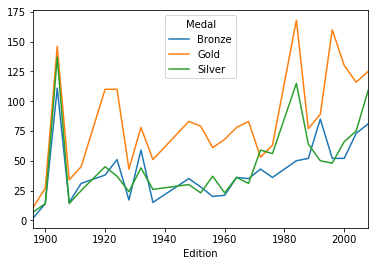

In [78]:
import matplotlib.pyplot as plt

# Create the DataFrame: usa
usa = medals[medals['NOC'] == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

usa_medals_by_year.head()
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

## Visualizing USA Medal Counts by Edition: Area Plot

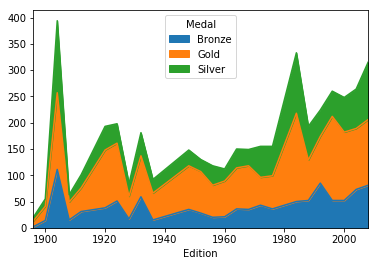

In [79]:
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

## Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals
We may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver. However, we would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.

We can achieve this using Categorical types. In this final exercise, after redefining the 'Medal' column of the DataFrame medals, we will repeat the area plot from the previous cell to see the new ordering.